# Descriptive Analysis and Visualization

In [1]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

from sklearn import tree, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import ttest_ind
import joblib

pd.set_option('display.max_rows', 100,'display.max_columns', 100)

In [3]:
df = joblib.load('/dsa/groups/capstonesp2022/on-campus/group_1/data/visualization_dataset.pkl')

In [4]:
df['year'].replace(2009,'2009-2010', inplace=True)
df['year'].replace(2011, '2011-2012', inplace=True)
df['year'].replace(2013,'2013-2014', inplace=True)
df['year'].replace(2015,'2015-2016', inplace=True)
df['year'].replace(2017,'2017-2018', inplace=True)

In [5]:
df.describe()

,age,haddock,mackerel,perch,porgy,sea_bass,trout,sodium,potassium,caffeine,how_long_taking_insulin,mins_sedentary_activity,mins_moderate_intensity_activity,number_of_days_moderate_intensity_activity,sleep_hour,cholesterol,insulin_uu_ml,BMI
count,25926.000000,16840.00000,16840.000000,16840.000000,16840.000000,16840.000000,16840.000000,2.382800e+04,2.382800e+04,2.382800e+04,25926.000000,2.589100e+04,9447.000000,9489.000000,25846.000000,2.382800e+04,11630.000000,25699.000000
mean,47.557240,1.96639,1.974881,1.969418,1.990618,1.978800,1.959382,3.529155e+03,2.625295e+03,1.475204e+02,1.000694,3.980370e+02,187.113687,4.408157,7.164764,2.997408e+02,14.442032,40.477727
std,16.367299,0.18023,0.156490,0.172187,0.096410,0.144053,0.197408,1.863549e+03,1.280354e+03,2.044307e+02,23.057245,6.555055e+02,504.574031,3.997868,2.628987,2.451825e+02,19.224750,142.332429
min,20.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,5.397605e-79,5.397605e-79,5.397605e-79,0.000000,5.397605e-79,10.000000,1.000000,2.000000,5.397605e-79,0.140000,0.000000
25%,33.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.256000e+03,1.744000e+03,1.100000e+01,0.000000,1.800000e+02,60.000000,3.000000,6.000000,1.300000e+02,6.380000,23.700000
50%,47.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,3.190000e+03,2.427000e+03,9.500000e+01,0.000000,3.000000e+02,120.000000,5.000000,7.000000,2.310000e+02,10.180000,27.400000
75%,61.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,4.384000e+03,3.278000e+03,2.040000e+02,0.000000,4.800000e+02,240.000000,5.000000,8.000000,4.020000e+02,16.680000,32.100000
max,79.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.594900e+04,1.917500e+04,5.151000e+03,999.000000,9.999000e+03,9999.000000,99.000000,99.000000,2.968000e+03,682.480000,3051.200000


In [6]:
df.columns

Index(['gender', 'age', 'active_duty', 'race', 'pulse_regularity', 'haddock',
       'mackerel', 'perch', 'porgy', 'sea_bass', 'trout', 'sodium',
       'potassium', 'caffeine', 'smoke', 'insulin', 'how_long_taking_insulin',
       'insulin_unit_month_year', 'diabetes', 'prediabetes',
       'mins_sedentary_activity', 'mins_moderate_intensity_activity',
       'number_of_days_moderate_intensity_activity', 'alcohol',
       'alcohol_usage', 'sleep_hour', 'sleep_disorder', 'salt_add_at_table',
       'salt_add_in_preparation', 'cholesterol', 'insulin_uu_ml', 'year',
       'HBP', 'salt_usage', 'BMI', 'insulin_usage', 'bmi_range', 'age_group'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25926 entries, 0 to 47651
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   gender                                      25926 non-null  object 
 1   age                                         25926 non-null  float64
 2   active_duty                                 25923 non-null  object 
 3   race                                        25926 non-null  object 
 4   pulse_regularity                            24930 non-null  object 
 5   haddock                                     16840 non-null  float64
 6   mackerel                                    16840 non-null  float64
 7   perch                                       16840 non-null  float64
 8   porgy                                       16840 non-null  float64
 9   sea_bass                                    16840 non-null  float64
 10  trout     

Creating functions for visualization.

In [8]:
# Calculating high blood pressure percentage by year according to given columns. 
# Takes 4 parameters, and 2 of them are required.
# Param : dataframe -> Pandas dataframe
#         columns   -> A list of column names that we want to check.
#         condition -> Default is None. Pass Yes to get only people with high blood pressure 
#                      No for to get people who do not have high blood pressure.
#         index_all -> Boolean flag to include overall percentage.
# Return : Padas dataframe with percentages.
def get_hbp_percentage_by_year(dataframe, columns, condition=None, index_all=False):
    columns.insert(0, 'year')
    tmp = dataframe.groupby(columns)['HBP'].value_counts(normalize=True).rename('percentage').mul(100).round(1).reset_index()
    if index_all:
        tmp2 = dataframe.groupby('year')['HBP'].value_counts(normalize=True).rename('percentage').mul(100).round(1).reset_index()
        tmp = pd.concat([tmp, tmp2])
        tmp.fillna('All', inplace=True)
    if condition:
        tmp = tmp.query("HBP=='{condition}'".format(condition=condition))
    print(tmp)
    return tmp

In [9]:
# Calculating high blood pressure percentage by year according to given column. 
# Takes 2 parameters.
# Param : dataframe -> Pandas dataframe
#         column    -> A column name that we want to check.
# Return : Padas dataframe with percentages.
def get_percentage_by_year(dataframe, column):
    tmp = dataframe.groupby('year')[column].value_counts(normalize=True).rename('percentage').mul(100).round(1).reset_index()
    print(tmp)
    return tmp

In [10]:
# Calculating high blood pressure percentage according to given column. 
# Takes 3 parameters.
# Param : dataframe -> Pandas dataframe
#         column    -> A column name that we want to check.
#         index     -> Default is False. If you want to return a Pandas dataframe, pass True.
# Return : Padas dataframe with percentages.
def get_percentage(dataframe, column, index = False):
    if not index: 
        tmp = dataframe[column].value_counts(normalize=True).rename('percentage').mul(100).round(1)#.reset_index()
        return tmp
    tmp = dataframe[column].value_counts(normalize=True).rename('percentage').mul(100).round(1).reset_index()
    tmp = tmp.rename(columns={'index': column})
    print(tmp)
    return tmp

In [11]:
# Calculating count by given column. 
# Takes 2 parameters.
# Param : dataframe -> Pandas dataframe
#         column    -> A column name that we want to check.
# Return : Padas dataframe with counts.
def get_column_counts(dataframe, column):
    tmp = dataframe.groupby(column).agg({column:'count'}).rename(columns={column:'count'}).reset_index()    
    print(tmp)
    return tmp

In [12]:
# This function is for bivariate analysis. It calculates the percentage according to given column.
# Takes 3 parameters.
# Param : dataframe -> Pandas dataframe
#         column    -> A column name that we want to check.
#         condition -> Default is None. Pass yes if you want to get only people who have high blood pressure, 
#                      No for who do not have high blood pressure.
# Return : Padas dataframe with percentages.
def bivariate(dataframe, column, condition=None):
    tmp = dataframe.groupby(column)['HBP'].value_counts(normalize=True).rename('percentage').mul(100).round(1).reset_index()
    if condition:
        tmp = tmp.query("HBP=='{condition}'".format(condition=condition))
    print(tmp)
    return tmp

In [13]:
# This function is for multivariate analysis. It calculates the percentage according to given columns.
# Takes 3 parameters.
# Param : dataframe -> Pandas dataframe
#         column    -> A list of column names that we want to check.
#         condition -> Default is None. Pass yes if you want to get only people who have high blood pressure, 
#                      No for who do not have high blood pressure.
# Return : Padas dataframe with percentages.
def multivariate(dataframe, columns, condition=None): 
    tmp1 = dataframe.groupby(columns)['HBP'].value_counts(normalize=True).rename('percentage').mul(100).round(1).reset_index()
    tmp2 = dataframe.groupby(columns[1])['HBP'].value_counts(normalize=True).rename('percentage').mul(100).round(1).reset_index()
    tmp = pd.concat([tmp1, tmp2])
    tmp.fillna('All', inplace=True)
    if condition:
        tmp = tmp.query("HBP=='{condition}'".format(condition=condition))
    print(tmp)
    return tmp

In [84]:
# This a generic function for visualization.
# Takes 8 parameters.
# Param : dataframe  -> Pandas dataframe
#         plot_type  -> Plot type such as bar, pie, violin, etc.
#         x          -> x axis
#         y          -> y axis
#         background -> Plot background color. Default color is gray.
#         palette    -> Color palette.
#         borders    -> Plot borders. Default is True. If you want to add borders pass False.
#         hue        -> Hue
#         rotation   -> Rotation flag for x axis labels. False no rattion, True will rotate 90 degrees.
def plot(dataframe, plot_type, x, y, size=(10,7), background = '#eaeaf2', palette='Set2', borders = True, hue=None, rotation=False, xlabel='', ylabel='', order=[]):
    if not order:#empty
        order = list(dataframe[x].unique())
    if xlabel=='' or ylabel=='':
        xlabel = x
        ylabel = y
    
    if not hue is None:
        hue_title = hue.replace('_',' ')
        if not hue_title == 'HBP':
            hue_title = hue_title.capitalize()
    else:
        hue_title = ''
            
    sns.set(color_codes=borders)
    plt.figure(figsize=size)
    
    if plot_type == 'bar':
        ax = sns.barplot(data=dataframe, x=x, y=y, palette= palette, hue=hue, order=order)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_facecolor('#eaeaf2')
        ax.legend(title=hue_title,  loc='upper left',bbox_to_anchor = (1,1))
    elif plot_type == 'violin': #Update
        ax = sns.violinplot(data=dataframe, x=x, y=y, palette= palette, split=True, hue=hue, inner="quart")
        ax.set_facecolor('#eaeaf2')
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_facecolor('#eaeaf2')
        ax.legend(title=hue_title, loc='upper left',bbox_to_anchor = (1,1))
    elif plot_type == 'pie': # add colors = colors2
        fig, ax = plt.subplots(figsize=size)
        ax = ax.pie(dataframe, labels=list(dataframe.index), autopct='%.1f%%', textprops={'size': 'large'}, startangle=90 )
        plt.legend(loc='lower center', ncol=len(list(dataframe.index)))
        plt.tight_layout()
    elif plot_type == 'line':
        ax=sns.lineplot(data = dataframe, x=x, y=y, hue=hue, marker="o")
        ax.set_facecolor('#eaeaf2')
        ax.set_ylim(ymin=0,ymax=100)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.legend(title=hue_title, loc='upper left',bbox_to_anchor = (1,1))
    if rotation:
        ax.tick_params(axis='x', rotation=90)


### Distribution Analysis

#### Age Distribution

No handles with labels found to put in legend.


  age_group  count
0   20 - 40   9737
1   40 - 60   9281
2       60+   6908


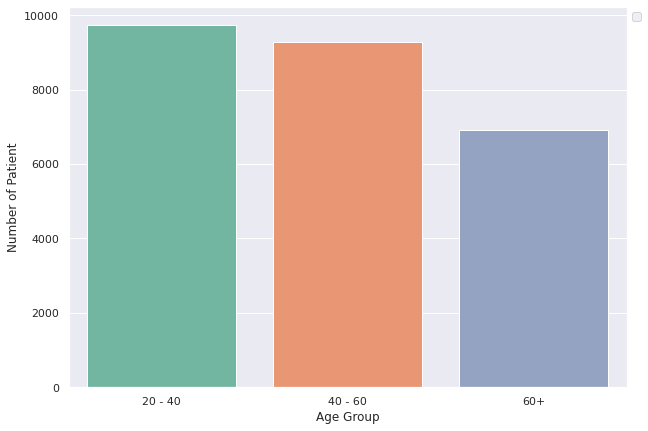

In [85]:
plot(dataframe=get_column_counts(df, 'age_group'), plot_type='bar', x='age_group', y='count',size=(10,7), xlabel='Age Group', ylabel='Number of Patient')

##### Gender Distribution

<Figure size 720x504 with 0 Axes>

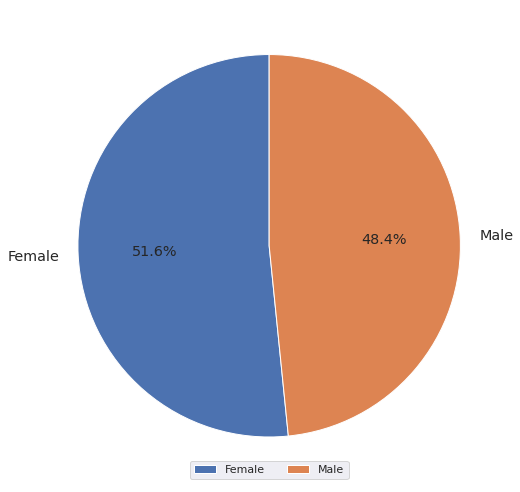

In [16]:
plot(dataframe=get_percentage(df, 'gender'), plot_type='pie', x='gender', y='gender')

##### Race Distribution

No handles with labels found to put in legend.


               race  percentage
0             White        37.0
1             Black        22.5
2  Mexican American        15.1
3    Other Hispanic        10.7
4             Asian        10.5
5      Multi-Racial         4.2


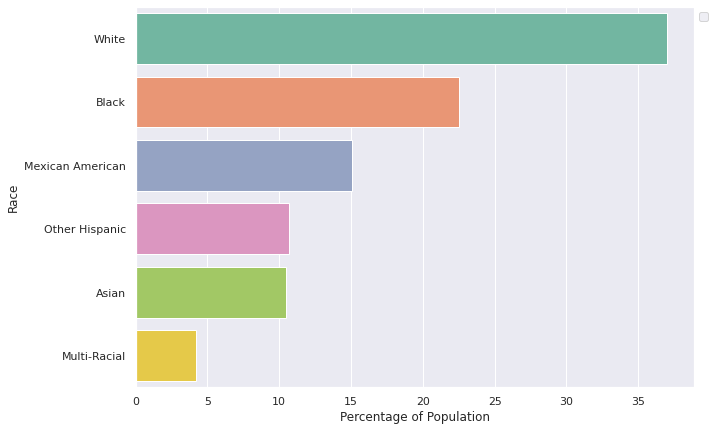

In [17]:
plot(dataframe=get_percentage(df, 'race', index=True), plot_type='bar', x='percentage', y='race', size=(10,7), xlabel='Percentage of Population', ylabel='Race')

#### Distribution by Age, Race and Gender

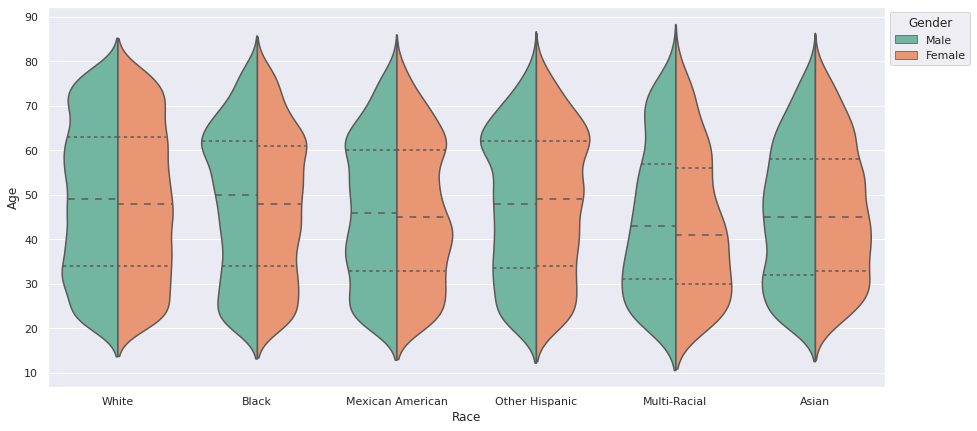

In [18]:
plot(dataframe=df, plot_type='violin', x='race', y='age', size=(15,7), hue='gender', xlabel='Race', ylabel='Age')

##### High blood pressure distribution

In [19]:
# Bar plot
#plot(dataframe=get_percentage(df, 'HBP',index=True), plot_type='bar', x='HBP', y='percentage', size=(10,7))

<Figure size 720x504 with 0 Axes>

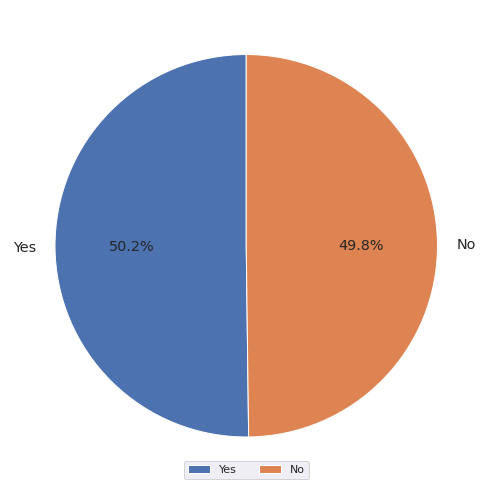

In [20]:
plot(dataframe=get_percentage(df, 'HBP'), plot_type='pie', x='HBP', y='HBP')

#### High blood pressure distribution analysis by age, and gender

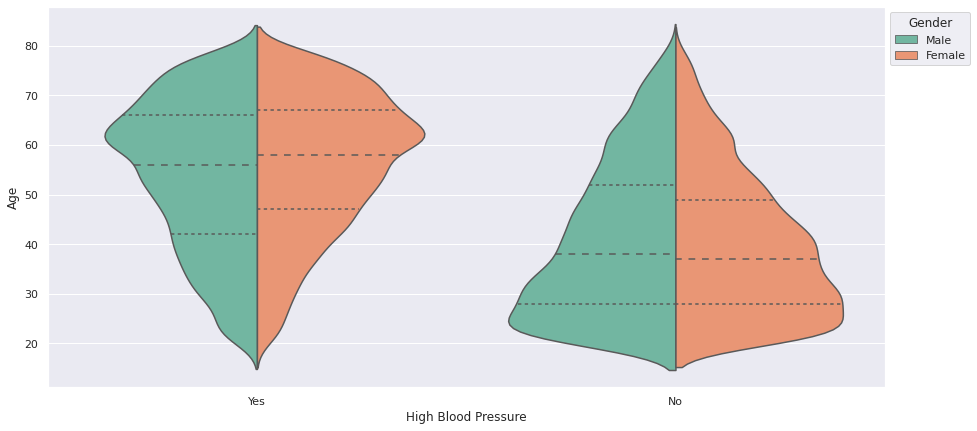

In [21]:
plot(dataframe=df, plot_type='violin', x='HBP', y='age', size=(15,7), hue='gender', xlabel='High Blood Pressure', ylabel='Age')

## Year Analysis

##### High Blood Pressure by Year

In [22]:
# Bar plot
#plot(dataframe=get_hbp_percentage_by_year(df, []), plot_type='bar', x='year', y='percentage', hue='HBP')

        year  HBP  percentage
1  2009-2010  Yes        48.2
3  2011-2012  Yes        49.3
5  2013-2014  Yes        49.1
6  2015-2016  Yes        51.4
8  2017-2018  Yes        53.6


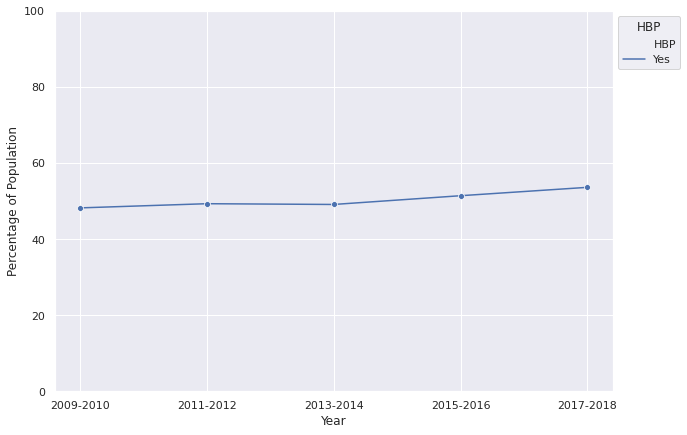

In [23]:
plot(dataframe=get_hbp_percentage_by_year(df, [], condition="Yes" ), plot_type='line', x='year', y='percentage', hue='HBP', xlabel='Year', ylabel='Percentage of Population')

##### Gender distribution by year

        year  gender  percentage
0  2009-2010  Female        51.6
1  2009-2010    Male        48.4
2  2011-2012  Female        50.6
3  2011-2012    Male        49.4
4  2013-2014  Female        52.1
5  2013-2014    Male        47.9
6  2015-2016  Female        52.0
7  2015-2016    Male        48.0
8  2017-2018  Female        51.8
9  2017-2018    Male        48.2


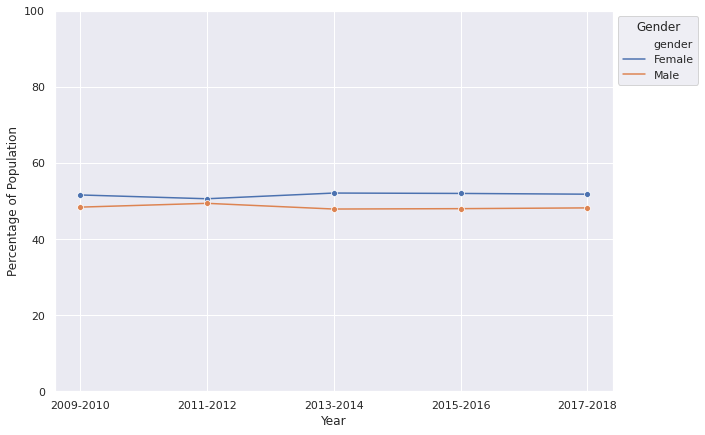

In [24]:
plot(dataframe=get_percentage_by_year(df, 'gender'), plot_type='line', x='year', y='percentage', hue='gender',  xlabel='Year', ylabel='Percentage of Population')

##### Gender and high blood pressure by year

         year  gender  HBP  percentage
1   2009-2010  Female  Yes        44.7
2   2009-2010    Male  Yes        52.0
5   2011-2012  Female  Yes        45.1
6   2011-2012    Male  Yes        53.7
9   2013-2014  Female  Yes        46.4
10  2013-2014    Male  Yes        52.0
13  2015-2016  Female  Yes        48.0
14  2015-2016    Male  Yes        55.0
17  2017-2018  Female  Yes        49.1
18  2017-2018    Male  Yes        58.4
1   2009-2010     All  Yes        48.2
3   2011-2012     All  Yes        49.3
5   2013-2014     All  Yes        49.1
6   2015-2016     All  Yes        51.4
8   2017-2018     All  Yes        53.6


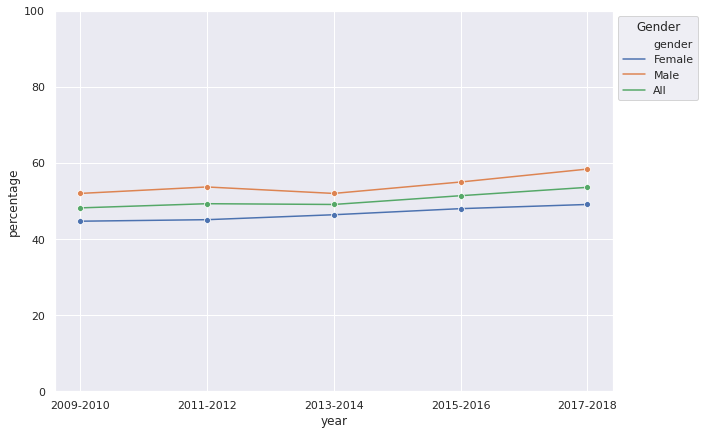

In [25]:
plot(dataframe=get_hbp_percentage_by_year(df, ['gender'], index_all= True, condition='Yes')
         , plot_type='line', x='year', y='percentage', hue='gender')

##### Race distribution by year

         year              race  percentage
0   2009-2010             White        46.0
1   2009-2010  Mexican American        19.0
2   2009-2010             Black        18.7
3   2009-2010    Other Hispanic        10.6
4   2009-2010      Multi-Racial         5.7
5   2011-2012             White        34.5
6   2011-2012             Black        27.3
7   2011-2012             Asian        14.7
8   2011-2012    Other Hispanic        10.4
9   2011-2012  Mexican American        10.2
10  2011-2012      Multi-Racial         2.9
11  2013-2014             White        40.8
12  2013-2014             Black        21.1
13  2013-2014  Mexican American        14.0
14  2013-2014             Asian        11.9
15  2013-2014    Other Hispanic         9.1
16  2013-2014      Multi-Racial         3.1
17  2015-2016             White        30.6
18  2015-2016             Black        21.8
19  2015-2016  Mexican American        18.0
20  2015-2016    Other Hispanic        13.7
21  2015-2016             Asian 

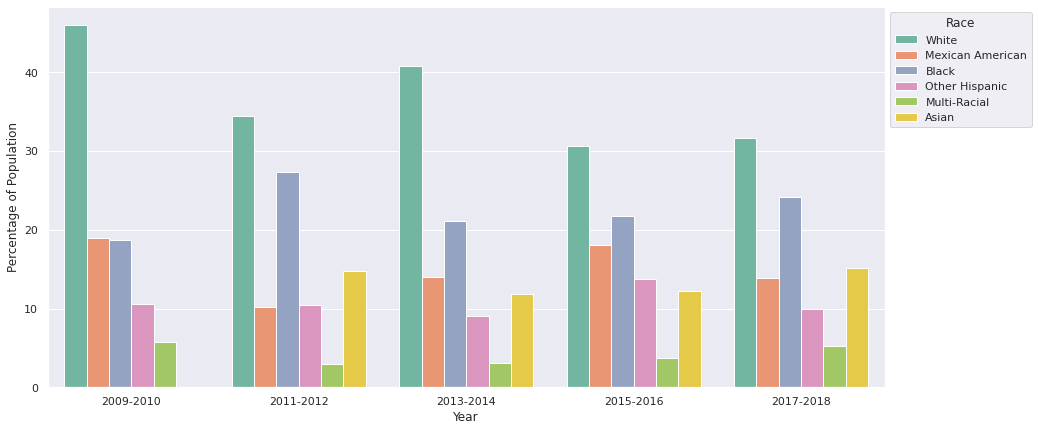

In [26]:
plot(dataframe=get_percentage_by_year(df, 'race'), plot_type='bar', x='year', y='percentage', hue='race', size=(15,7),  xlabel='Year', ylabel='Percentage of Population')

##### Age group by year

         year age_group  percentage
0   2009-2010   20 - 40        38.0
1   2009-2010   40 - 60        35.9
2   2009-2010       60+        26.0
3   2011-2012   20 - 40        39.7
4   2011-2012   40 - 60        35.4
5   2011-2012       60+        24.9
6   2013-2014   20 - 40        37.8
7   2013-2014   40 - 60        36.7
8   2013-2014       60+        25.5
9   2015-2016   20 - 40        38.1
10  2015-2016   40 - 60        35.6
11  2015-2016       60+        26.3
12  2017-2018   40 - 60        35.3
13  2017-2018   20 - 40        34.0
14  2017-2018       60+        30.7


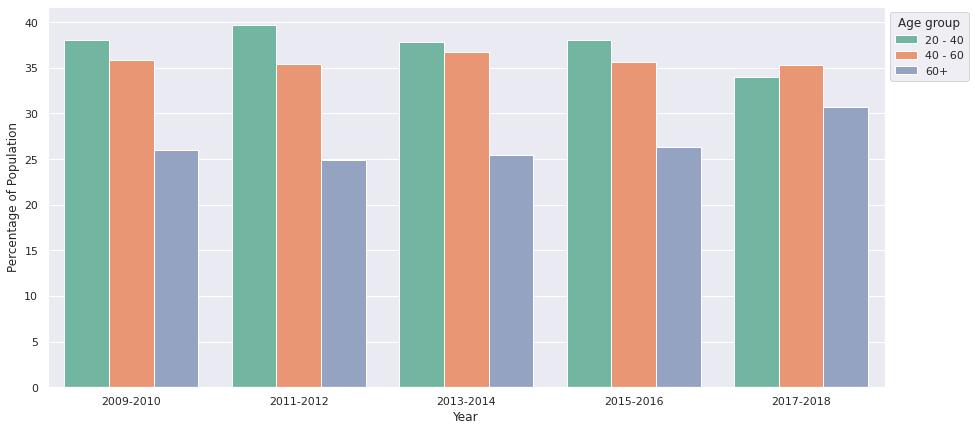

In [27]:
plot(dataframe=get_percentage_by_year(df, 'age_group'), plot_type='bar', x='year', y='percentage', hue='age_group', size=(15,7),  xlabel='Year', ylabel='Percentage of Population')

##### Age group and high blood pressure by year

         year age_group  HBP  percentage
1   2009-2010   20 - 40  Yes        23.3
2   2009-2010   40 - 60  Yes        52.0
4   2009-2010       60+  Yes        79.4
7   2011-2012   20 - 40  Yes        25.1
8   2011-2012   40 - 60  Yes        56.7
10  2011-2012       60+  Yes        77.3
13  2013-2014   20 - 40  Yes        24.5
14  2013-2014   40 - 60  Yes        54.7
16  2013-2014       60+  Yes        77.4
19  2015-2016   20 - 40  Yes        25.8
20  2015-2016   40 - 60  Yes        58.7
22  2015-2016       60+  Yes        78.6
25  2017-2018   20 - 40  Yes        27.6
26  2017-2018   40 - 60  Yes        57.5
28  2017-2018       60+  Yes        77.9
1   2009-2010       All  Yes        48.2
3   2011-2012       All  Yes        49.3
5   2013-2014       All  Yes        49.1
6   2015-2016       All  Yes        51.4
8   2017-2018       All  Yes        53.6


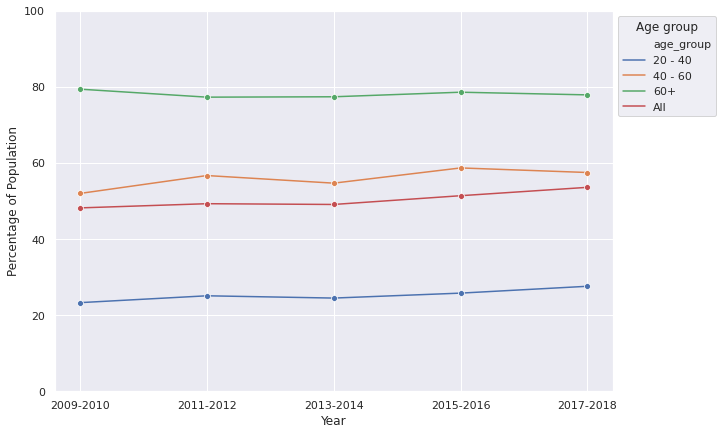

In [28]:
plot(dataframe=get_hbp_percentage_by_year(df, ['age_group'], index_all= True, condition='Yes')
     ,plot_type='line', x='year', y='percentage', hue='age_group',  xlabel='Year', ylabel='Percentage of Population')

##### Age group, gender and high blood pressure

    gender age_group  HBP  percentage
1   Female   20 - 40  Yes        18.8
2   Female   40 - 60  Yes        52.6
4   Female       60+  Yes        78.7
7     Male   20 - 40  Yes        32.0
8     Male   40 - 60  Yes        59.3
10    Male       60+  Yes        77.6
1      All   20 - 40  Yes        25.1
2      All   40 - 60  Yes        55.8
4      All       60+  Yes        78.2


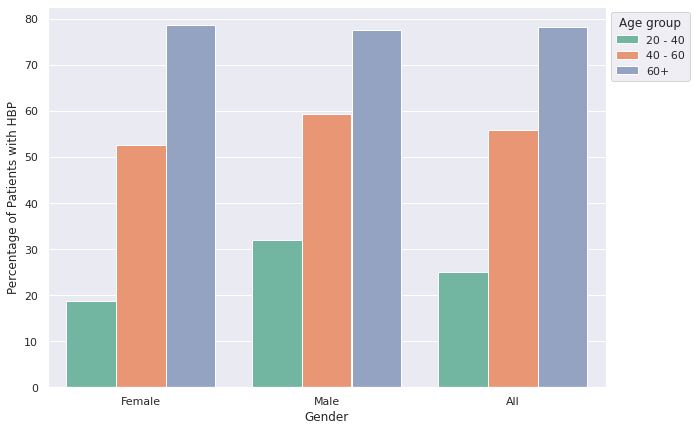

In [66]:
plot(dataframe=multivariate(df, ['gender', 'age_group'], condition='Yes'), plot_type='bar'
     , x='gender', y='percentage', hue='age_group',  xlabel='Gender', ylabel='Percentage of Patients with HBP')

##### Gender, race and high blood pressure

    gender              race  HBP  percentage
1   Female             Asian  Yes        37.1
2   Female             Black  Yes        59.4
5   Female  Mexican American  Yes        41.6
7   Female      Multi-Racial  Yes        43.0
9   Female    Other Hispanic  Yes        44.7
11  Female             White  Yes        44.5
13    Male             Asian  Yes        45.2
14    Male             Black  Yes        63.4
17    Male  Mexican American  Yes        48.3
18    Male      Multi-Racial  Yes        56.2
20    Male    Other Hispanic  Yes        50.7
22    Male             White  Yes        54.1
1      All             Asian  Yes        41.0
2      All             Black  Yes        61.4
5      All  Mexican American  Yes        44.8
7      All      Multi-Racial  Yes        49.7
9      All    Other Hispanic  Yes        47.4
11     All             White  Yes        49.2


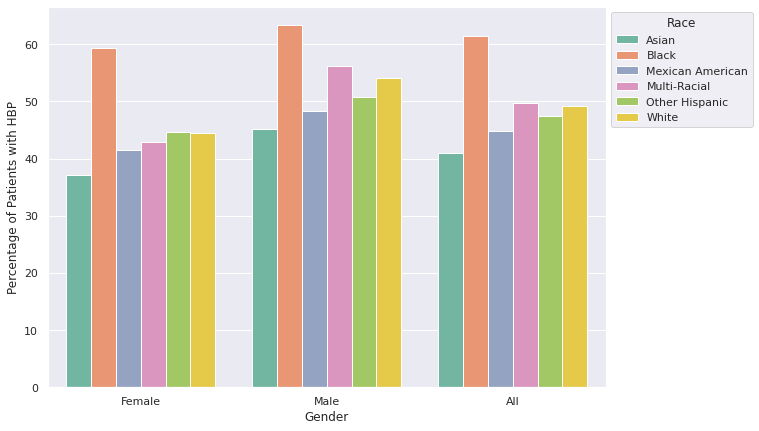

In [67]:
plot(dataframe=multivariate(df, ['gender','race'], condition='Yes'), plot_type='bar', x='gender', y='percentage', hue='race', xlabel='Gender', ylabel='Percentage of Patients with HBP')

   age_group              race  HBP  percentage
1    20 - 40             Asian  Yes        18.3
3    20 - 40             Black  Yes        31.9
5    20 - 40  Mexican American  Yes        21.7
7    20 - 40      Multi-Racial  Yes        30.0
9    20 - 40    Other Hispanic  Yes        19.9
11   20 - 40             White  Yes        25.7
13   40 - 60             Asian  Yes        47.2
14   40 - 60             Black  Yes        69.9
17   40 - 60  Mexican American  Yes        49.8
18   40 - 60      Multi-Racial  Yes        56.2
20   40 - 60    Other Hispanic  Yes        51.8
22   40 - 60             White  Yes        53.1
24       60+             Asian  Yes        73.8
26       60+             Black  Yes        87.1
28       60+  Mexican American  Yes        76.7
30       60+      Multi-Racial  Yes        86.1
32       60+    Other Hispanic  Yes        76.3
34       60+             White  Yes        74.2
1        All             Asian  Yes        41.0
2        All             Black  Yes     

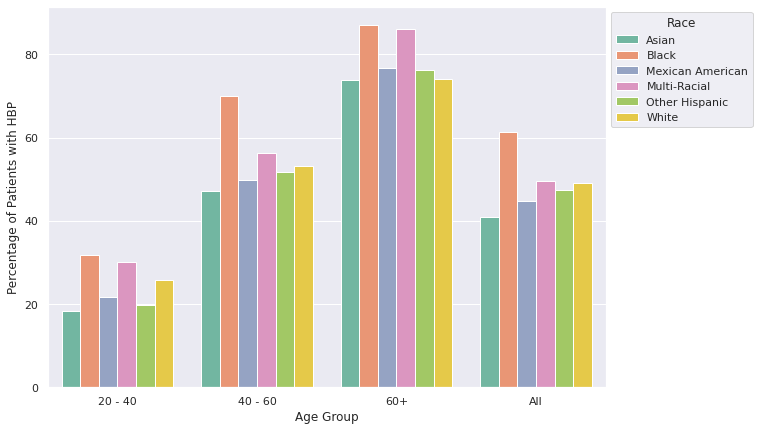

In [68]:
plot(dataframe=multivariate(df, ['age_group','race'], condition='Yes'), plot_type='bar', x='age_group', y='percentage', hue='race', xlabel='Age Group', ylabel='Percentage of Patients with HBP')

# Active duty distribution by year

        year active_duty  percentage
0  2009-2010          No        89.2
1  2009-2010         Yes        10.8
2  2011-2012          No        91.6
3  2011-2012         Yes         8.4
4  2013-2014          No        92.1
5  2013-2014         Yes         7.9
6  2015-2016          No        92.2
7  2015-2016         Yes         7.8
8  2017-2018          No        91.5
9  2017-2018         Yes         8.5


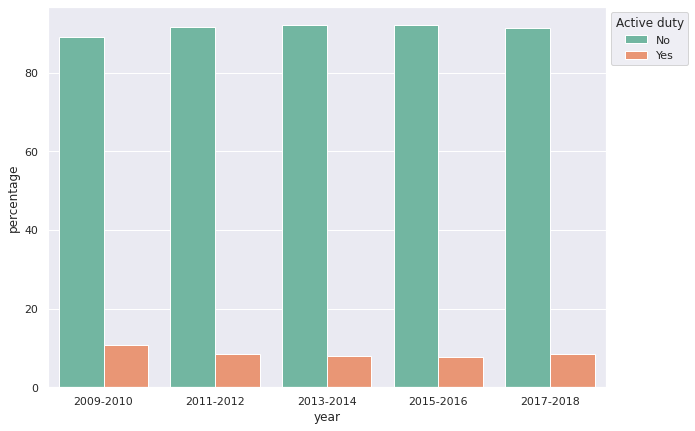

In [31]:
plot(dataframe=get_percentage_by_year(df, 'active_duty'), plot_type='bar', x='year', y='percentage', hue='active_duty')

##### Active duty, gender, and high blood pressure 

   gender active_duty  HBP  percentage
1  Female          No  Yes        46.6
3  Female         Yes  Yes        48.2
4    Male          No  Yes        51.2
6    Male         Yes  Yes        68.8
1     All          No  Yes        48.6
2     All         Yes  Yes        67.2


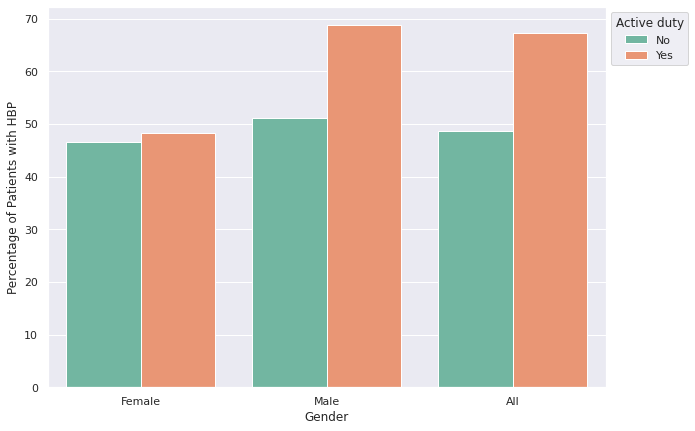

In [32]:
plot(dataframe=multivariate(df, ['gender','active_duty'], condition='Yes'), plot_type='bar', x='gender', y='percentage', hue='active_duty' , xlabel='Gender', ylabel='Percentage of Patients with HBP')

##### Active duty, age group, and high blood pressure

   age_group active_duty  HBP  percentage
1    20 - 40          No  Yes        24.8
3    20 - 40         Yes  Yes        34.3
4    40 - 60          No  Yes        55.2
6    40 - 60         Yes  Yes        63.3
8        60+          No  Yes        78.1
10       60+         Yes  Yes        78.5
1        All          No  Yes        48.6
2        All         Yes  Yes        67.2


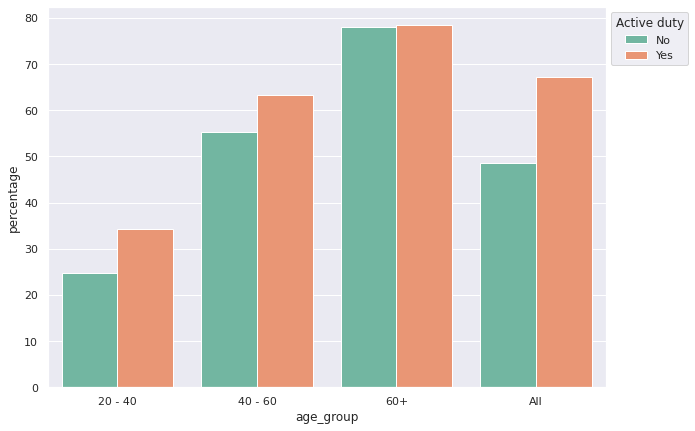

In [33]:
plot(dataframe=multivariate(df, ['age_group','active_duty'], condition='Yes'), plot_type='bar', x='age_group', y='percentage', hue='active_duty')

##### Active duty, race and high blood pressure

                race active_duty  HBP  percentage
1              Asian          No  Yes        40.8
2              Asian         Yes  Yes        54.1
4              Black          No  Yes        59.9
6              Black         Yes  Yes        72.3
9   Mexican American          No  Yes        43.8
10  Mexican American         Yes  Yes        69.5
13      Multi-Racial          No  Yes        46.9
14      Multi-Racial         Yes  Yes        73.1
17    Other Hispanic          No  Yes        46.4
18    Other Hispanic         Yes  Yes        65.0
21             White          No  Yes        47.3
22             White         Yes  Yes        64.0
1                All          No  Yes        48.6
2                All         Yes  Yes        67.2


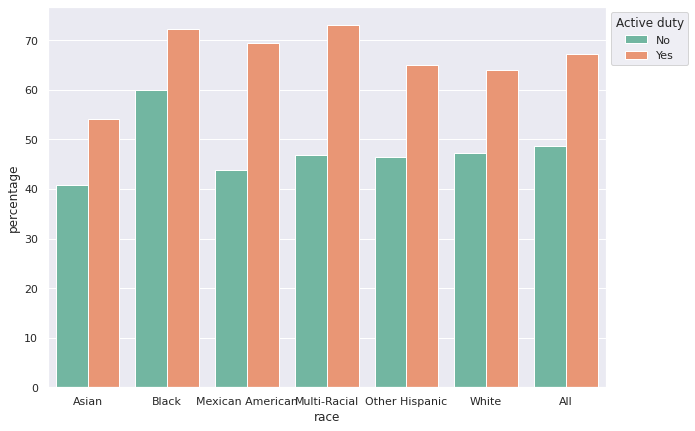

In [34]:
plot(dataframe=multivariate(df, ['race','active_duty'], condition='Yes'), plot_type='bar', x='race', y='percentage', hue='active_duty')

##### Smokers by year

        year smoke  percentage
0  2009-2010    No        53.9
1  2009-2010   Yes        46.1
2  2011-2012    No        57.4
3  2011-2012   Yes        42.6
4  2013-2014    No        56.1
5  2013-2014   Yes        43.9
6  2015-2016    No        58.3
7  2015-2016   Yes        41.7
8  2017-2018    No        58.4
9  2017-2018   Yes        41.6


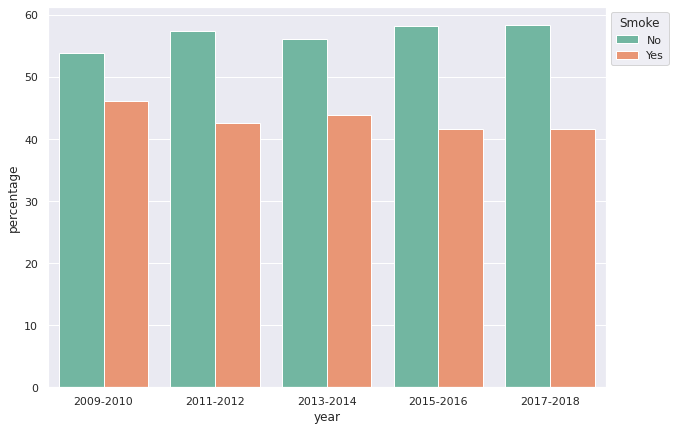

In [35]:
plot(dataframe=get_percentage_by_year(df, 'smoke'), plot_type='bar', x='year', y='percentage', hue='smoke')

##### Smokers and high blood pressure by year

         year smoke  HBP  percentage
1   2009-2010    No  Yes        45.2
2   2009-2010   Yes  Yes        51.7
5   2011-2012    No  Yes        44.2
6   2011-2012   Yes  Yes        56.2
9   2013-2014    No  Yes        44.6
10  2013-2014   Yes  Yes        54.9
13  2015-2016    No  Yes        46.5
14  2015-2016   Yes  Yes        58.2
17  2017-2018    No  Yes        49.0
18  2017-2018   Yes  Yes        60.0
1   2009-2010   All  Yes        48.2
3   2011-2012   All  Yes        49.3
5   2013-2014   All  Yes        49.1
6   2015-2016   All  Yes        51.4
8   2017-2018   All  Yes        53.6


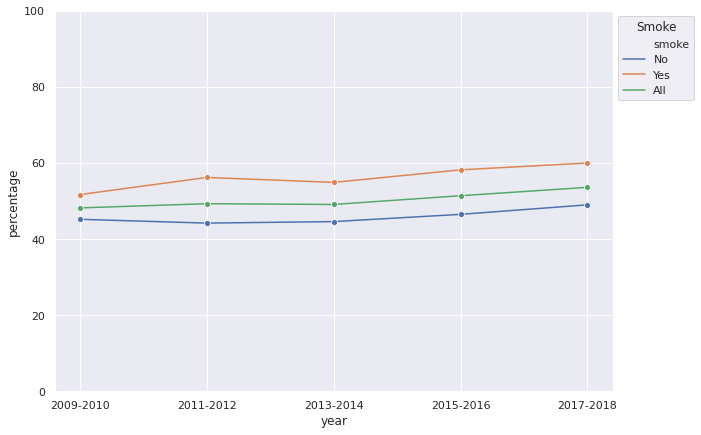

In [36]:
plot(dataframe=get_hbp_percentage_by_year(df, ['smoke'], index_all= True, condition='Yes'), plot_type='line', x='year', y='percentage', hue='smoke')

##### Smokers, gender, and high blood pressure

   gender smoke  HBP  percentage
1  Female    No  Yes        43.4
2  Female   Yes  Yes        52.9
5    Male    No  Yes        49.6
6    Male   Yes  Yes        58.1
1     All    No  Yes        45.9
2     All   Yes  Yes        56.0


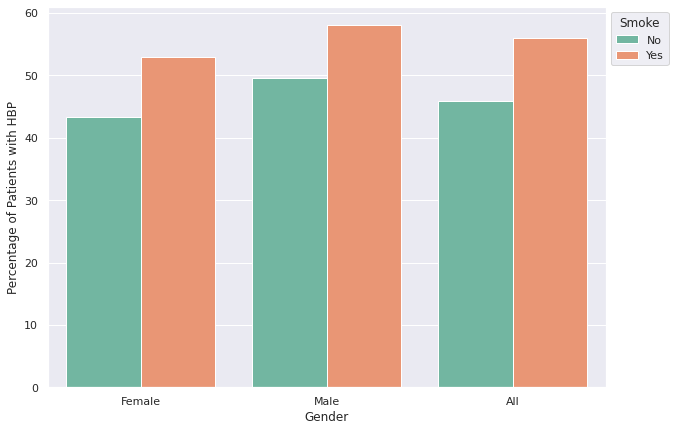

In [37]:
plot(dataframe=multivariate(df, ['gender','smoke'], condition='Yes'), plot_type='bar', x='gender', y='percentage', hue='smoke', xlabel='Gender', ylabel='Percentage of Patients with HBP')

##### Smokers, age group, and high blood pressure

   age_group smoke  HBP  percentage
1    20 - 40    No  Yes        22.5
3    20 - 40   Yes  Yes        29.7
4    40 - 60    No  Yes        53.0
6    40 - 60   Yes  Yes        59.3
8        60+    No  Yes        78.0
10       60+   Yes  Yes        78.4
1        All    No  Yes        45.9
2        All   Yes  Yes        56.0


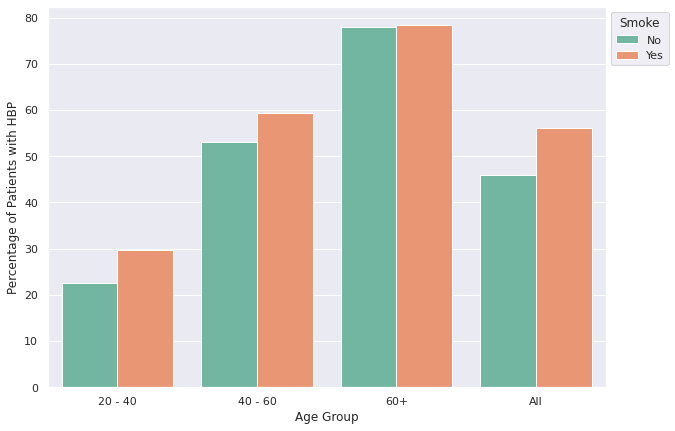

In [38]:
plot(dataframe=multivariate(df, ['age_group','smoke'], condition='Yes'), plot_type='bar', x='age_group', y='percentage', hue='smoke',  xlabel='Age Group', ylabel='Percentage of Patients with HBP')

##### Smokers, race and high blood pressure

                race smoke  HBP  percentage
1              Asian    No  Yes        38.8
3              Asian   Yes  Yes        48.1
4              Black    No  Yes        56.1
6              Black   Yes  Yes        68.4
9   Mexican American    No  Yes        41.2
10  Mexican American   Yes  Yes        51.2
13      Multi-Racial    No  Yes        44.3
14      Multi-Racial   Yes  Yes        55.8
17    Other Hispanic    No  Yes        44.7
18    Other Hispanic   Yes  Yes        51.6
21             White    No  Yes        44.9
22             White   Yes  Yes        53.1
1                All    No  Yes        45.9
2                All   Yes  Yes        56.0


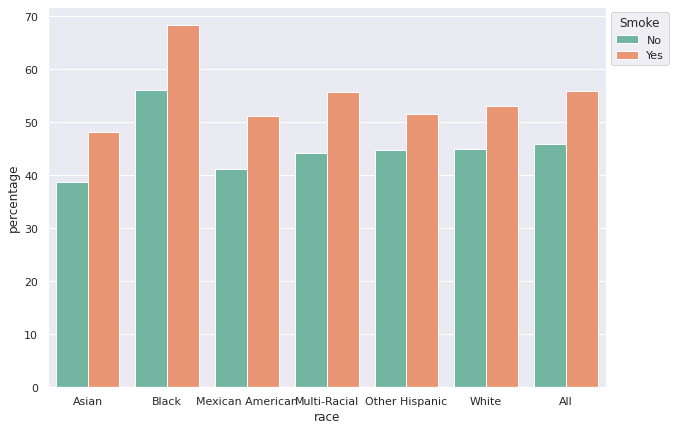

In [39]:
plot(dataframe=multivariate(df, ['race','smoke'], condition='Yes'), plot_type='bar', x='race', y='percentage', hue='smoke')

##### Alcohol usage by year

In [40]:
alcohol = df[ (df['alcohol_usage'] == '4. 2 times a week') |
 (df['alcohol_usage'] == '1. Every day') |
 (df['alcohol_usage'] == '2. Nearly every day') |
 (df['alcohol_usage'] == '5. Once a week') |
 (df['alcohol_usage'] == '3. 3 to 4 times a week')]

         year           alcohol_usage  percentage
0   2009-2010          5. Once a week        40.0
1   2009-2010       4. 2 times a week        25.3
2   2009-2010  3. 3 to 4 times a week        18.8
3   2009-2010            1. Every day        10.7
4   2009-2010     2. Nearly every day         5.1
5   2011-2012          5. Once a week        37.6
6   2011-2012       4. 2 times a week        29.2
7   2011-2012  3. 3 to 4 times a week        15.2
8   2011-2012            1. Every day        10.6
9   2011-2012     2. Nearly every day         7.4
10  2013-2014          5. Once a week        39.6
11  2013-2014       4. 2 times a week        27.4
12  2013-2014  3. 3 to 4 times a week        19.2
13  2013-2014            1. Every day         7.4
14  2013-2014     2. Nearly every day         6.4
15  2015-2016          5. Once a week        38.6
16  2015-2016       4. 2 times a week        26.6
17  2015-2016  3. 3 to 4 times a week        16.6
18  2015-2016            1. Every day        11.3


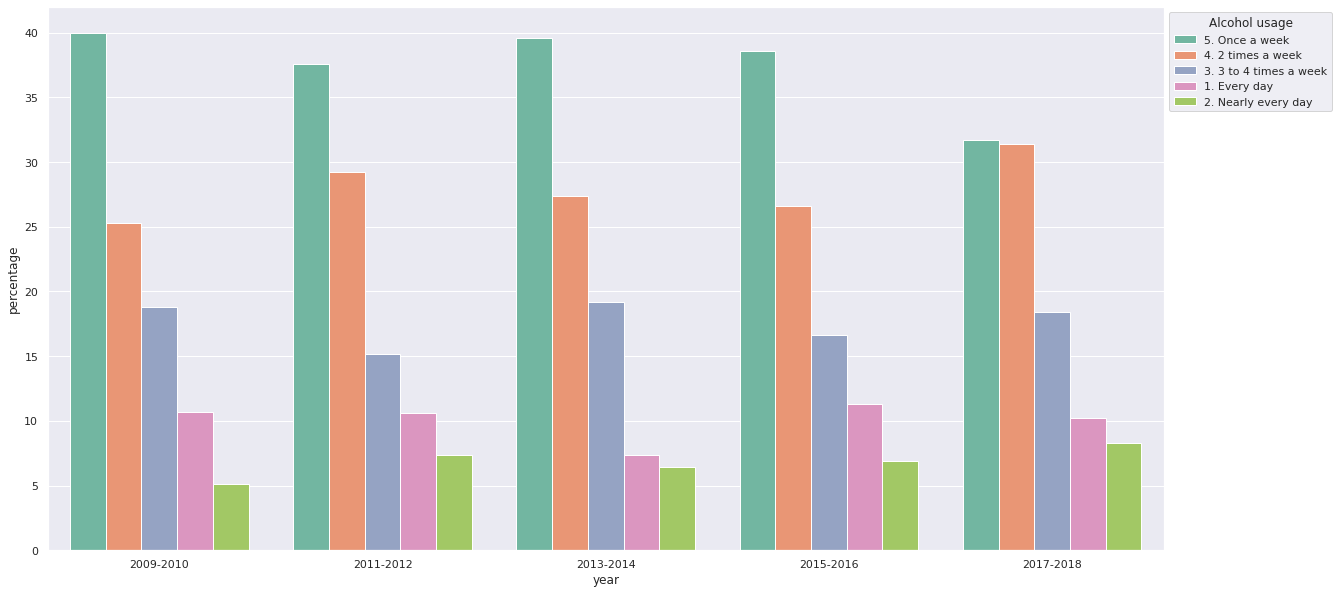

In [41]:
plot(dataframe=get_percentage_by_year(alcohol, 'alcohol_usage'), plot_type='bar',size=(20,10), x='year', y='percentage', hue='alcohol_usage')

##### Alcohol usage, high blood pressure by year

         year           alcohol_usage  HBP  percentage
0   2009-2010            1. Every day  Yes        58.0
2   2009-2010     2. Nearly every day  Yes        70.8
5   2009-2010  3. 3 to 4 times a week  Yes        43.2
6   2009-2010       4. 2 times a week  Yes        52.5
9   2009-2010          5. Once a week  Yes        40.6
10  2011-2012            1. Every day  Yes        88.4
12  2011-2012     2. Nearly every day  Yes        66.7
15  2011-2012  3. 3 to 4 times a week  Yes        45.2
17  2011-2012       4. 2 times a week  Yes        46.2
19  2011-2012          5. Once a week  Yes        47.1
20  2013-2014            1. Every day  Yes        62.1
22  2013-2014     2. Nearly every day  Yes        60.0
24  2013-2014  3. 3 to 4 times a week  Yes        54.7
27  2013-2014       4. 2 times a week  Yes        43.9
29  2013-2014          5. Once a week  Yes        44.5
30  2015-2016            1. Every day  Yes        86.4
32  2015-2016     2. Nearly every day  Yes        70.4
35  2015-2

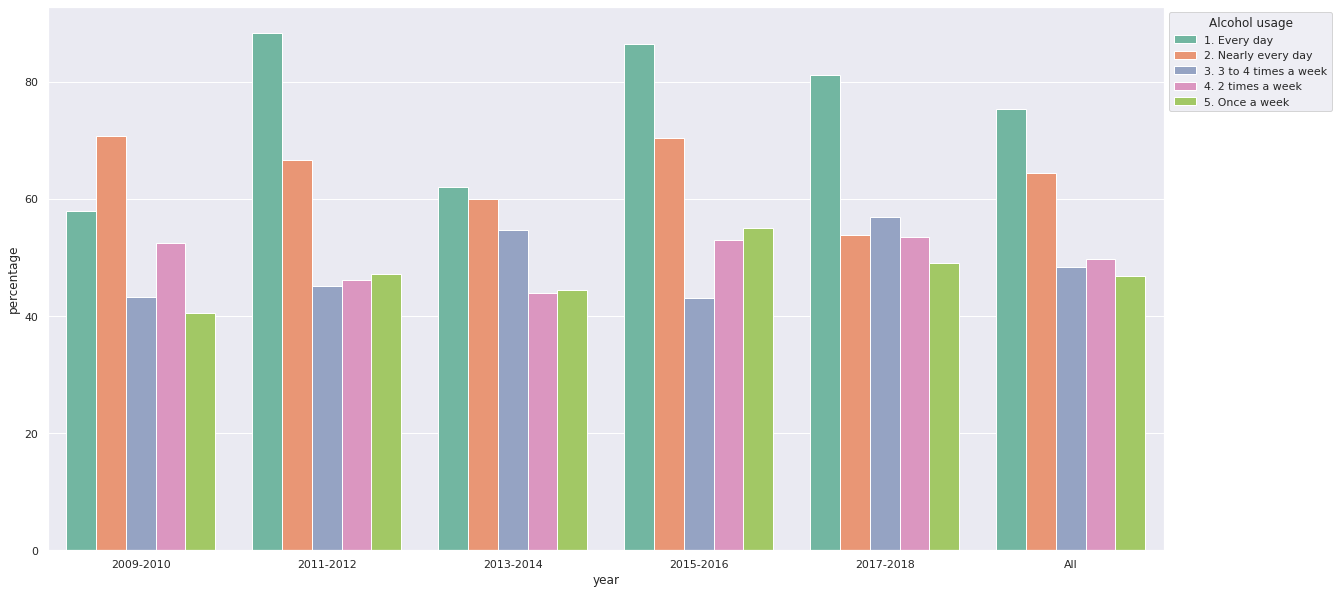

In [42]:
plot(dataframe=multivariate(alcohol, ['year','alcohol_usage'], condition='Yes'), plot_type='bar', x='year', y='percentage', size=(20,10), hue='alcohol_usage')

##### Alcohol usage, race, and high blood pressure

                race           alcohol_usage  HBP  percentage
0              Asian            1. Every day  Yes        87.5
3              Asian     2. Nearly every day  Yes        50.0
5              Asian  3. 3 to 4 times a week  Yes        44.4
7              Asian       4. 2 times a week  Yes        20.0
9              Asian          5. Once a week  Yes        36.0
10             Black            1. Every day  Yes        74.6
12             Black     2. Nearly every day  Yes        72.4
14             Black  3. 3 to 4 times a week  Yes        51.1
16             Black       4. 2 times a week  Yes        62.3
18             Black          5. Once a week  Yes        61.1
20  Mexican American            1. Every day  Yes        66.7
22  Mexican American     2. Nearly every day  Yes        66.7
25  Mexican American  3. 3 to 4 times a week  Yes        48.9
27  Mexican American       4. 2 times a week  Yes        42.4
29  Mexican American          5. Once a week  Yes        48.4
30      

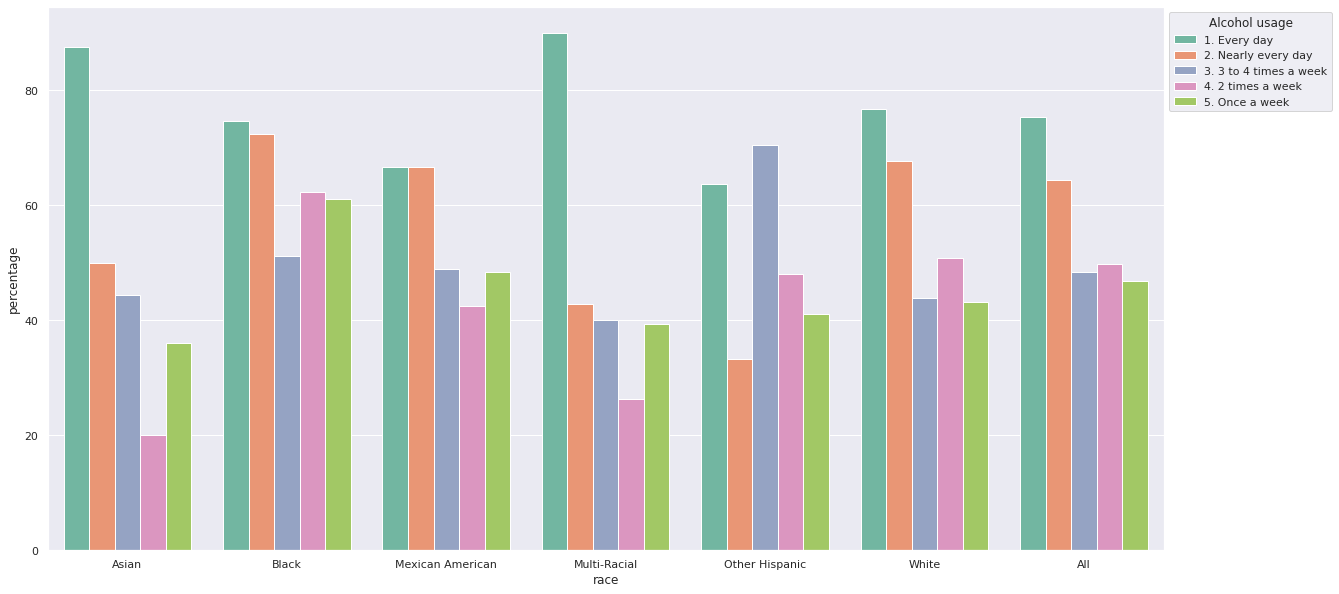

In [43]:
plot(dataframe=multivariate(alcohol, ['race','alcohol_usage'], condition='Yes'), plot_type='bar', x='race', y='percentage',size=(20,10), hue='alcohol_usage')

##### Alcohol usage and high blood pressure

            alcohol_usage  HBP  percentage
0            1. Every day  Yes        75.3
1            1. Every day   No        24.7
2     2. Nearly every day  Yes        64.4
3     2. Nearly every day   No        35.6
4  3. 3 to 4 times a week   No        51.7
5  3. 3 to 4 times a week  Yes        48.3
6       4. 2 times a week   No        50.3
7       4. 2 times a week  Yes        49.7
8          5. Once a week   No        53.2
9          5. Once a week  Yes        46.8


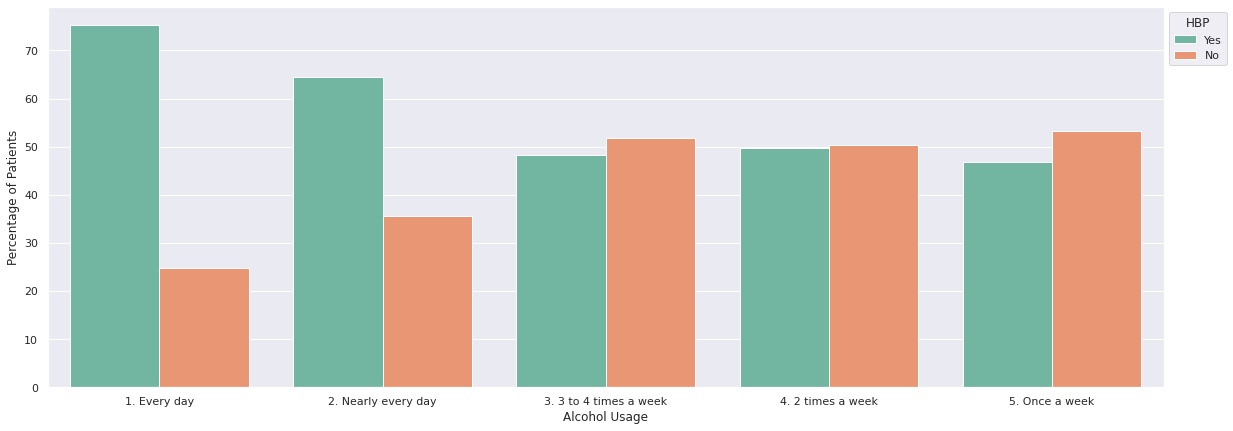

In [44]:
plot(dataframe=bivariate(alcohol, 'alcohol_usage'), plot_type='bar', x='alcohol_usage', y='percentage', size=(20,7), hue='HBP', rotation=False, xlabel='Alcohol Usage', ylabel='Percentage of Patients')


##### BMI by year

         year    bmi_range  percentage
0   2009-2010        Obese        34.7
1   2009-2010   Overweight        33.6
2   2009-2010       Normal        28.8
3   2009-2010  Underweight         2.9
4   2011-2012        Obese        32.6
5   2011-2012   Overweight        32.3
6   2011-2012       Normal        32.2
7   2011-2012  Underweight         2.9
8   2013-2014        Obese        33.8
9   2013-2014   Overweight        33.5
10  2013-2014       Normal        30.3
11  2013-2014  Underweight         2.5
12  2015-2016        Obese        35.2
13  2015-2016   Overweight        31.5
14  2015-2016       Normal        28.9
15  2015-2016  Underweight         4.4
16  2017-2018        Obese        37.7
17  2017-2018   Overweight        32.1
18  2017-2018       Normal        26.5
19  2017-2018  Underweight         3.7


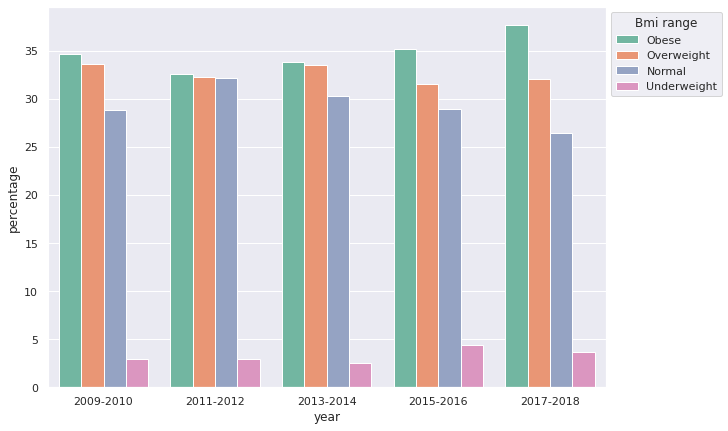

In [45]:
plot(dataframe=get_percentage_by_year(df, 'bmi_range'), plot_type='bar', x='year', y='percentage', hue='bmi_range')

##### BMI and high blood pressure

     bmi_range  HBP  percentage
0       Normal   No        64.6
1       Normal  Yes        35.4
2        Obese  Yes        63.4
3        Obese   No        36.6
4   Overweight  Yes        51.2
5   Overweight   No        48.8
6  Underweight   No        65.0
7  Underweight  Yes        35.0


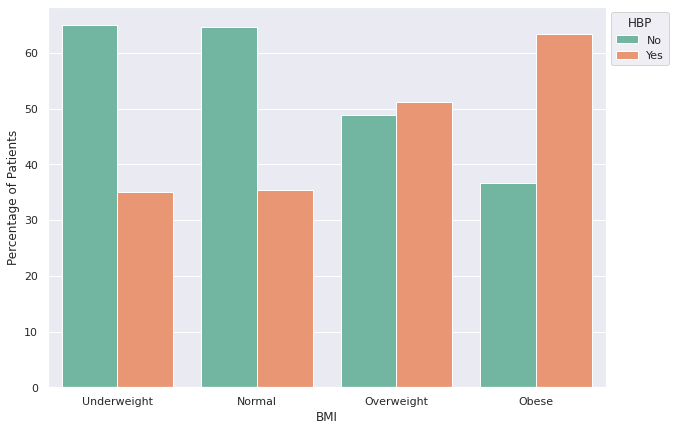

In [87]:
order = ['Underweight','Normal','Overweight','Obese'] 
plot(dataframe=bivariate(df, 'bmi_range'), plot_type='bar', x='bmi_range', y='percentage', hue='HBP', xlabel='BMI', ylabel='Percentage of Patients', order=order)

##### BMI, gender, and high blood pressure

    gender    bmi_range  HBP  percentage
1   Female       Normal  Yes        30.9
2   Female        Obese  Yes        60.6
5   Female   Overweight  Yes        47.6
7   Female  Underweight  Yes        33.3
9     Male       Normal  Yes        40.9
10    Male        Obese  Yes        66.8
12    Male   Overweight  Yes        54.0
15    Male  Underweight  Yes        38.3
1      All       Normal  Yes        35.4
2      All        Obese  Yes        63.4
4      All   Overweight  Yes        51.2
7      All  Underweight  Yes        35.0


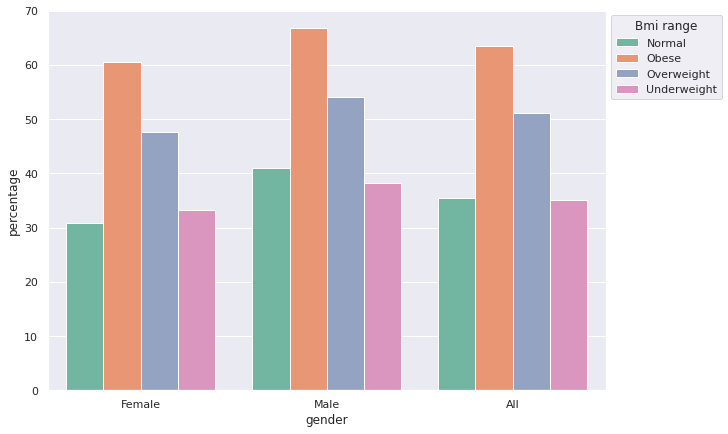

In [47]:
plot(dataframe=multivariate(df, ['gender','bmi_range'], condition='Yes'), plot_type='bar', x='gender', y='percentage', hue='bmi_range')

   age_group    bmi_range  HBP  percentage
1    20 - 40       Normal  Yes        14.6
3    20 - 40        Obese  Yes        40.3
5    20 - 40   Overweight  Yes        23.6
7    20 - 40  Underweight  Yes        12.8
9    40 - 60       Normal  Yes        39.8
10   40 - 60        Obese  Yes        69.0
12   40 - 60   Overweight  Yes        54.1
15   40 - 60  Underweight  Yes        45.9
16       60+       Normal  Yes        70.9
18       60+        Obese  Yes        84.6
20       60+   Overweight  Yes        77.7
22       60+  Underweight  Yes        68.0
1        All       Normal  Yes        35.4
2        All        Obese  Yes        63.4
4        All   Overweight  Yes        51.2
7        All  Underweight  Yes        35.0


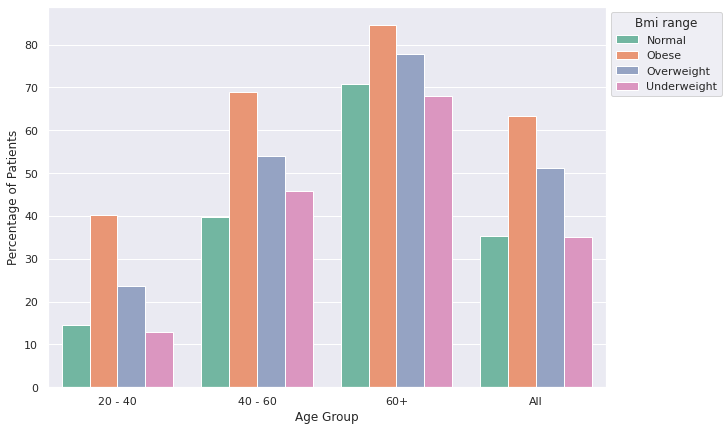

In [70]:
plot(dataframe=multivariate(df, ['age_group','bmi_range'], condition='Yes'), plot_type='bar', x='age_group', y='percentage', hue='bmi_range', xlabel='Age Group', ylabel='Percentage of Patients')

##### Pulse regularity by year

        year pulse_regularity  percentage
0  2009-2010          Regular        97.7
1  2009-2010        Irregular         2.3
2  2011-2012          Regular        98.2
3  2011-2012        Irregular         1.8
4  2013-2014          Regular        98.5
5  2013-2014        Irregular         1.5
6  2015-2016          Regular        97.3
7  2015-2016        Irregular         2.7
8  2017-2018          Regular        97.3
9  2017-2018        Irregular         2.7


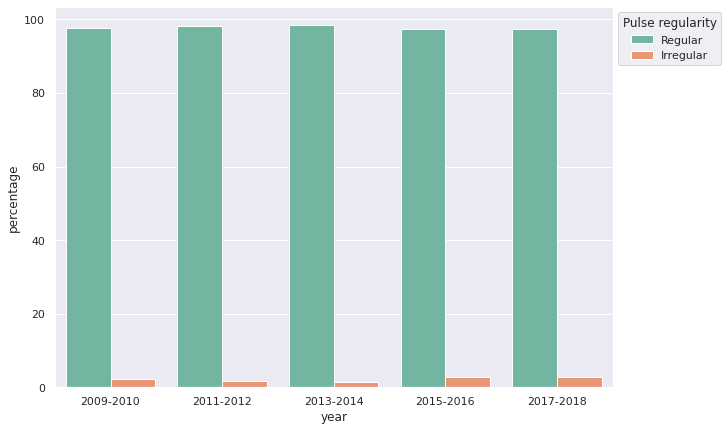

In [48]:
plot(dataframe=get_percentage_by_year(df, 'pulse_regularity'), plot_type='bar', x='year', y='percentage', hue='pulse_regularity')

##### Pulse regularity and high blood pressure

  pulse_regularity  HBP  percentage
0        Irregular  Yes        69.4
2          Regular  Yes        50.6


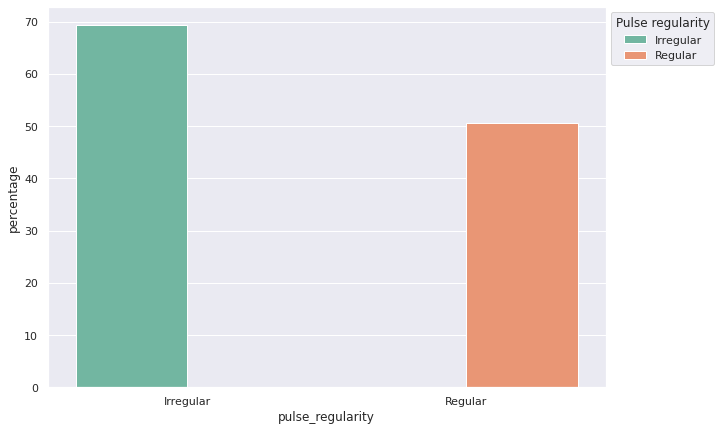

In [49]:
plot(dataframe=bivariate(df, 'pulse_regularity', condition='Yes'), plot_type='bar', x='pulse_regularity', y='percentage', hue='pulse_regularity')

##### Pulse regularity, gender, and high blood pressure

   gender pulse_regularity  HBP  percentage
0  Female        Irregular  Yes        67.0
3  Female          Regular  Yes        47.0
4    Male        Irregular  Yes        70.7
6    Male          Regular  Yes        54.5
0     All        Irregular  Yes        69.4
2     All          Regular  Yes        50.6


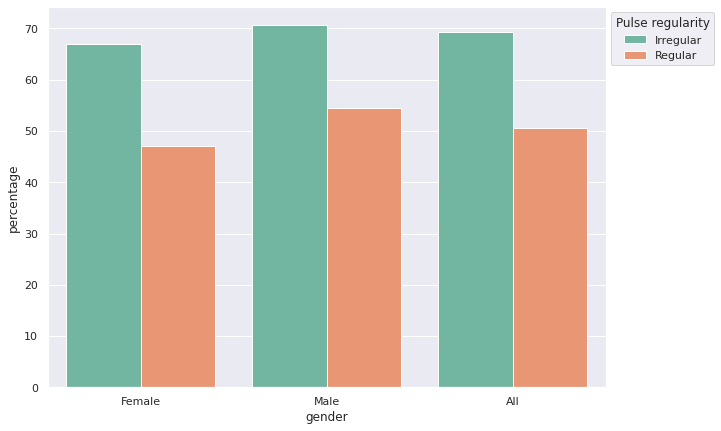

In [50]:
plot(dataframe=multivariate(df, ['gender','pulse_regularity'], condition='Yes'), plot_type='bar', x='gender', y='percentage', hue='pulse_regularity')

#####  Insulin and high blood pressure

      insulin  HBP  percentage
0  Don't know   No        66.7
1  Don't know  Yes        33.3
2          No   No        51.0
3          No  Yes        49.0
4         Yes  Yes        82.2
5         Yes   No        17.8


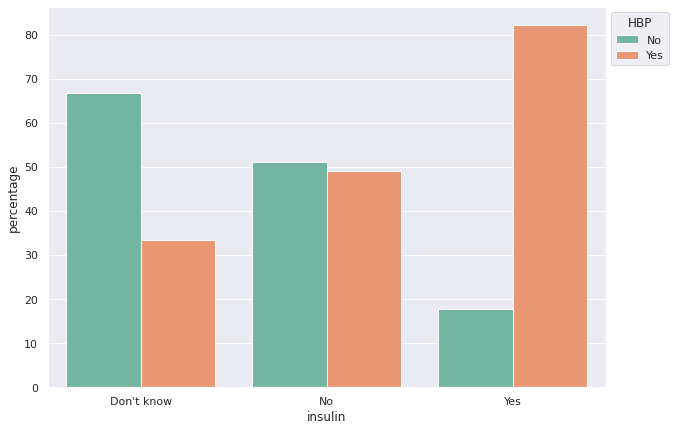

In [51]:
plot(dataframe=bivariate(df, 'insulin'), plot_type='bar', x='insulin', y='percentage', hue='HBP')

        insulin_usage  HBP  percentage
0             2 Month  Yes        65.4
1             2 Month   No        34.6
2          3-4 Months  Yes        85.7
3          3-4 Months   No        14.3
4         5-12 Months  Yes        78.4
5         5-12 Months   No        21.6
6  More than one year  Yes        83.1
7  More than one year   No        16.9
8                None   No        51.0
9                None  Yes        49.0


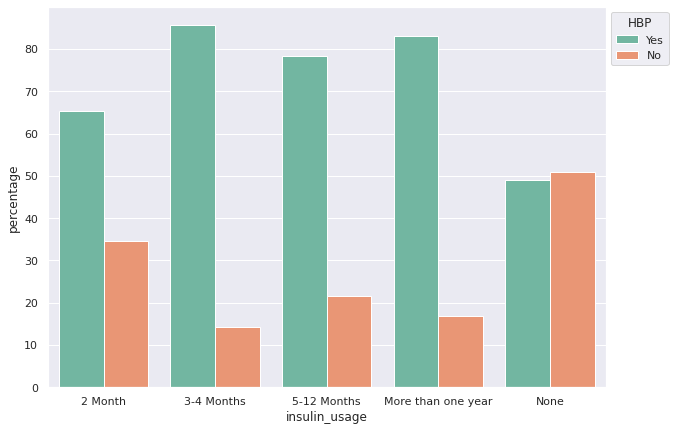

In [52]:
plot(dataframe=bivariate(df, 'insulin_usage'), plot_type='bar', x='insulin_usage', y='percentage', hue='HBP')

##### Prediabetes and high blood pressure

  prediabetes  HBP  percentage
0  Don't know   No        65.6
1  Don't know  Yes        34.4
2          No   No        56.5
3          No  Yes        43.5
4         Yes  Yes        64.5
5         Yes   No        35.5


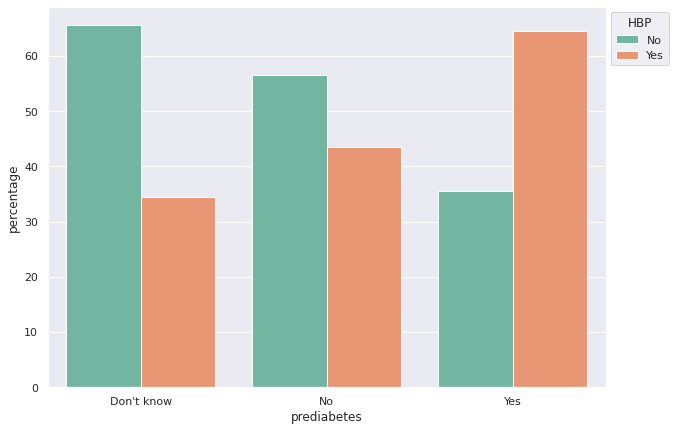

In [53]:
plot(bivariate(df, 'prediabetes'), 'bar', 'prediabetes', 'percentage', hue='HBP')

##### Diabetes and high blood pressure

     diabetes  HBP  percentage
0  Borderline  Yes        74.1
1  Borderline   No        25.9
2  Don't know   No        73.3
3  Don't know  Yes        26.7
4          No   No        55.0
5          No  Yes        45.0
6         Yes  Yes        80.0
7         Yes   No        20.0


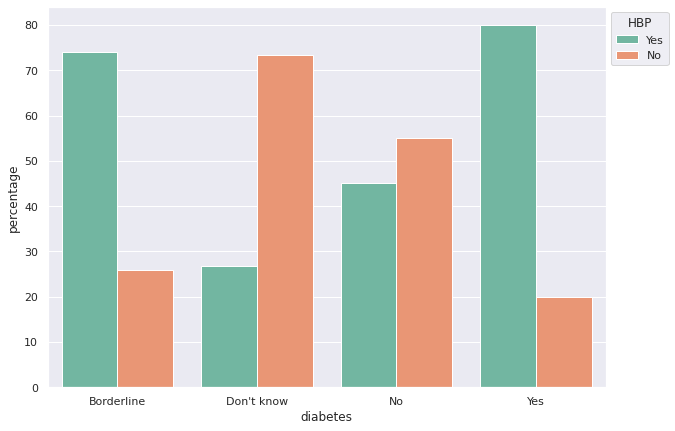

In [54]:
plot(bivariate(df, 'diabetes'), 'bar', 'diabetes', 'percentage', hue='HBP')

   prediabetes     insulin  HBP  percentage
1   Don't know          No  Yes        34.4
3           No  Don't know  Yes        50.0
5           No          No  Yes        43.5
6           No         Yes  Yes        83.3
8          Yes          No  Yes        64.4
10         Yes         Yes  Yes        75.0
1          All  Don't know  Yes        33.3
3          All          No  Yes        49.0
4          All         Yes  Yes        82.2


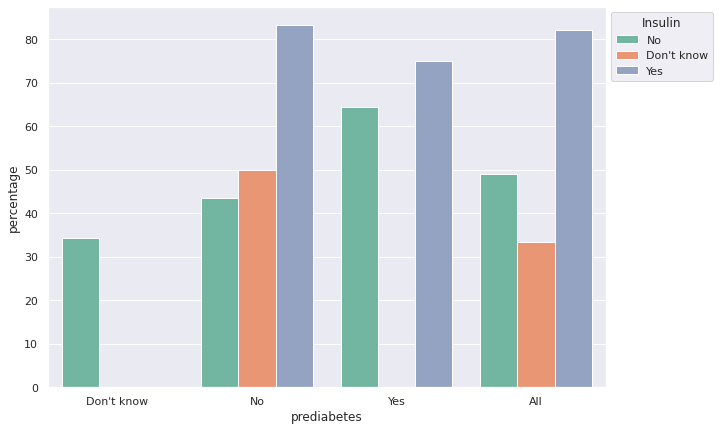

In [55]:
plot(dataframe=multivariate(df, ['prediabetes','insulin'], condition='Yes'), plot_type='bar', x='prediabetes', y='percentage', hue='insulin')

        year smoke  percentage
0  2009-2010    No        53.9
1  2009-2010   Yes        46.1
2  2011-2012    No        57.4
3  2011-2012   Yes        42.6
4  2013-2014    No        56.1
5  2013-2014   Yes        43.9
6  2015-2016    No        58.3
7  2015-2016   Yes        41.7
8  2017-2018    No        58.4
9  2017-2018   Yes        41.6


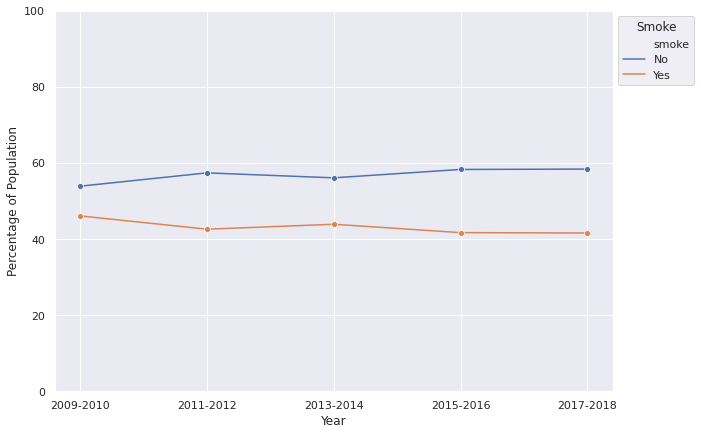

In [62]:
plot(dataframe=get_percentage_by_year(df, 'smoke'), plot_type='line', x='year', y='percentage', hue='smoke',  xlabel='Year', ylabel='Percentage of Population')

         year     alcohol  percentage
0   2009-2010         Yes        65.5
1   2009-2010          No        22.6
2   2009-2010  Don't know        11.9
3   2011-2012         Yes        65.0
4   2011-2012          No        23.1
5   2011-2012  Don't know        11.9
6   2013-2014         Yes        66.6
7   2013-2014          No        24.7
8   2013-2014  Don't know         8.7
9   2015-2016         Yes        62.3
10  2015-2016          No        27.9
11  2015-2016  Don't know         9.8
12  2017-2018         Yes        83.9
13  2017-2018          No         9.3
14  2017-2018  Don't know         6.8


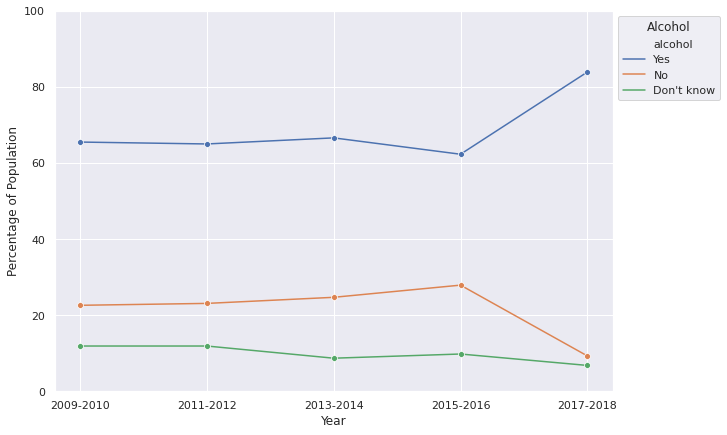

In [63]:
plot(dataframe=get_percentage_by_year(df, 'alcohol'), plot_type='line', x='year', y='percentage', hue='alcohol',  xlabel='Year', ylabel='Percentage of Population')

         year                      alcohol_usage  percentage
0   2009-2010                11. Never last year        32.1
1   2009-2010                     12. Don't know        30.8
2   2009-2010  10. 1 to 2 times in the last year         7.9
3   2009-2010   9. 3 to 6 times in the last year         6.7
4   2009-2010            6. 2 to 3 times a month         5.0
5   2009-2010                     5. Once a week         4.7
6   2009-2010                    7. Once a month         3.6
7   2009-2010                  4. 2 times a week         3.0
8   2009-2010             3. 3 to 4 times a week         2.2
9   2009-2010  8. 7 to 11 times in the last year         2.2
10  2009-2010                       1. Every day         1.3
11  2009-2010                2. Nearly every day         0.6
12  2011-2012                11. Never last year        32.6
13  2011-2012                     12. Don't know        31.7
14  2011-2012  10. 1 to 2 times in the last year         6.8
15  2011-2012   9. 3 to 

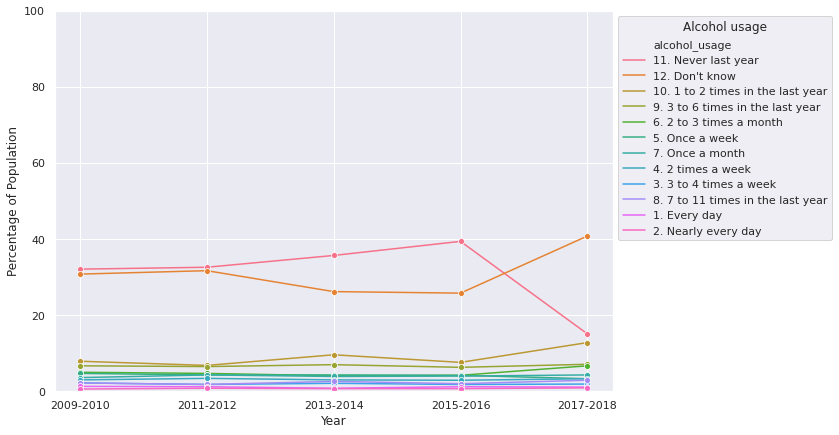

In [64]:
plot(dataframe=get_percentage_by_year(df, 'alcohol_usage'), plot_type='line', x='year', y='percentage', hue='alcohol_usage',  xlabel='Year', ylabel='Percentage of Population')